In [18]:
#import necessary codes
% matplotlib inline
from numpy import empty, asarray, linspace, sin, pi, mean, array
from newtonRaphson2 import *
import matplotlib.pyplot as plt

In [19]:
#define arrays for the two sets of values
angle = asarray([-30., 0., 30.]) * (pi / 180.)
R = asarray([6870., 6728., 6615.])
print angle, R

[-0.52359878  0.          0.52359878] [ 6870.  6728.  6615.]


In [20]:
#define the function given for R
def f(x): 
    f = empty([len(angle)])
    for w in range(len(angle)):
        f[w] = x[0]/(1. + x[1] * sin(angle[w] + x[2])) - R[w]
    return f

In [21]:
#Find approxiamations for C by calulating the mean of the values for R
#Find approxiamations for e by calculating the mean of C0/R - 1 found from rearranging the equation
#Approxiamations for found for when alpha = 0
#The maximum values can be found using the NewtonRaphson2 method for differentiation
if __name__ == "__main__":
    C0 = mean(R)
    e0 = mean(C0/R) - 1
    alpha0 = 0.
    x0 = [C0, e0, alpha0]
    print 'Initial approxiamations for C, e & alpha=', x0
    x = newtonRaphson2(f, array(x0))
    print 'Final values for C, e & alpha= ', x
    C, e, alpha = x

Initial approxiamations for C, e & alpha= [6737.666666666667, 0.00023933381867369263, 0.0]
Final values for C, e & alpha=  [  6.81929379e+03  -4.05989591e-02   6.63142297e+01]


In [22]:
#Find the value for the theta angle at which R is smallest by using the previously calculated value for alpha
angle_min = (3 * pi/2 - alpha) % (2 * pi) 
print "theta in radians= ", angle_min

theta in radians=  1.23001232884


In [23]:
#substitute in the value for the value of theta to find the smallest value for R
Rs = C / (1+e*sin(angle_max+alpha))
print 'Smallest value for R=', Rs

Smallest value for R= 6553.23910701


In [24]:
#We can also plot these points on a polar plot to visualise the orbit of the satellite
#Plot R as a function of theta by generating a 100 points between 0 & 2pi for theta
angle = linspace( 0, 2*pi, 100 )
R = C / (1 + e * sin(angle + alpha))

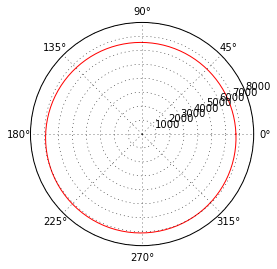

In [17]:
#Plot points on a polar plot
ax = plt.subplot( 111, polar=True )
ax.hold('on')
ax.plot(angle, R, color='red', linewidth=1 )
ax.set_rmax(8000)
ax.grid(True)
plt.show()